# Análisis del problema

Clasificar el estado del precio del intercambio de monedas de Euros a Dolares en el rango de 1 minutos utilizando indicadores de Volumen, Tendencia, Volatilidad y otros.

El EUR/USD (o Euro Dólar) pertenece al grupo de 'Majors', una forma de mencionar los pares más importantes del mundo. La popularidad del Euro Dólar se debe al hecho de que reúne dos economías principales: Europa y los Estados Unidos de América. Este es un par de divisas ampliamente negociado en el que el euro es la moneda base y el dólar estadounidense es la moneda contraria. Dado que el par EUR/USD consiste en más de la mitad de todo el volumen de negociación en todo el mundo en el Mercado Forex, es casi imposible que aparezca un gap o hueco, y mucho menos una brecha separatista consecuente en la dirección opuesta.

![](https://theshreddedfxtrader.com/wp-content/uploads/2019/01/currency_pairs_in_forex_trading.png)

### Librerías a utilizar

In [452]:
import warnings
warnings.simplefilter('ignore')

import math
import pandas as pd
#import psycopg2
# Use numpy to convert to arrays
import numpy as np
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sn
from seaborn import countplot
#from matplotlib.pyplot import figure, show
from seaborn import despine
from seaborn import set
from matplotlib.pyplot import suptitle
from seaborn import axes_style

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics

# import preprocessing from sklearn
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

import pyodbc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import itertools
import ta
import plotly.graph_objects as go

from plotly import __version__
from plotly.offline import init_notebook_mode, plot
from plotly.graph_objs import Scatter

init_notebook_mode(connected=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [453]:
#Semilla
RSEED = 50

In [511]:
features=pd.read_csv("EURUSD-M1.csv")

In [512]:
features=features.head(10000)

In [516]:
#Casteo de datos
features['open'] = features['open'].astype('float64')
features['high'] = features['high'].astype('float64')
features['low'] = features['low'].astype('float64')
features['close'] = features['close'].astype('float64')
features['volume'] = features['volume'].astype('float64')
features['color'] = features['color'].astype('int64')
#features['color'] = features['color'].astype('category')

In [517]:
#Carga de indicadores
features = ta.add_all_ta_features(
    features, open="open", high="high", low="low", close="close", volume="volume", fillna=True)

# Análisis exploratorio de datos

In [518]:
features.dtypes

Unnamed: 0                     int64
date                          object
open                         float64
high                         float64
low                          float64
close                        float64
volume                       float64
color                          int64
volume_adi                   float64
volume_obv                   float64
volume_cmf                   float64
volume_fi                    float64
momentum_mfi                 float64
volume_em                    float64
volume_sma_em                float64
volume_vpt                   float64
volume_nvi                   float64
volatility_atr               float64
volatility_bbm               float64
volatility_bbh               float64
volatility_bbl               float64
volatility_bbw               float64
volatility_bbp               float64
volatility_bbhi              float64
volatility_bbli              float64
volatility_kcc               float64
volatility_kch               float64
v

In [519]:
features.describe(include = 'all')

Unnamed: 0                 date          open          high  \
count   10000.00000                10000  10000.000000  10000.000000   
unique          NaN                10000           NaN           NaN   
top             NaN  2020-03-26 05:43:00           NaN           NaN   
freq            NaN                    1           NaN           NaN   
mean     4999.50000                  NaN      1.088737      1.088939   
std      2886.89568                  NaN      0.013916      0.013892   
min         0.00000                  NaN      1.063865      1.064000   
25%      2499.75000                  NaN      1.076909      1.077155   
50%      4999.50000                  NaN      1.085777      1.085997   
75%      7499.25000                  NaN      1.102915      1.103060   
max      9999.00000                  NaN      1.114670      1.114795   

                 low         close        volume         color    volume_adi  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        1.088536      1.088739    195.745900      0.495600  -2912.610112   
std         0.013940      0.013917     35.883033      0.500006   2411.094526   
min         1.063605      1.063860     28.000000      0.000000 -10186.427681   
25%         1.076671      1.076917    180.000000      0.000000  -4645.103759   
50%         1.085540      1.085787    201.000000      0.000000  -2767.590432   
75%         1.102751      1.102925    217.000000      1.000000  -1235.362580   
max         1.114315      1.114645    326.000000      1.000000   2249.798550   

          volume_obv    volume_cmf     volume_fi  momentum_mfi     volume_em  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    15740.110500     -0.003362     -0.000552     49.959340     -0.001858   
std      7735.896819      0.143473      0.017367     14.997033      0.094308   
min       170.000000     -0.525424     -0.136186      0.000000     -1.707171   
25%      9569.500000     -0.100561     -0.009031     40.332725     -0.020557   
50%     15573.500000     -0.003366     -0.000268     50.011358     -0.000321   
75%     20955.250000      0.090678      0.008051     58.712912      0.020323   
max     37113.000000      0.472091      0.115872    100.000000      3.037083   

        volume_sma_em    volume_vpt    volume_nvi  volatility_atr  \
count    10000.000000  10000.000000  10000.000000    10000.000000   
unique            NaN           NaN           NaN             NaN   
top               NaN           NaN           NaN             NaN   
freq              NaN           NaN           NaN             NaN   
mean        -0.001843     -0.000618    989.756876        0.000503   
std          0.028834      0.089157     11.354951        0.000207   
min         -0.245196     -0.721529    970.199978        0.000000   
25%         -0.010858     -0.039695    979.648765        0.000354   
50%         -0.000369     -0.000311    986.807141        0.000471   
75%          0.008602      0.039178   1001.089281        0.000615   
max          0.269778      2.099384   1009.136177        0.001857   

        volatility_bbm  volatility_bbh  volatility_bbl  volatility_bbw  \
count     10000.000000    10000.000000    10000.000000    10000.000000   
unique             NaN             NaN             NaN             NaN   
top                NaN             NaN             NaN             NaN   
freq               NaN             NaN             NaN             NaN   
mean          1.088766 

In [520]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10000 non-null  int64  
 1   date                       10000 non-null  object 
 2   open                       10000 non-null  float64
 3   high                       10000 non-null  float64
 4   low                        10000 non-null  float64
 5   close                      10000 non-null  float64
 6   volume                     10000 non-null  float64
 7   color                      10000 non-null  int64  
 8   volume_adi                 10000 non-null  float64
 9   volume_obv                 10000 non-null  float64
 10  volume_cmf                 10000 non-null  float64
 11  volume_fi                  10000 non-null  float64
 12  momentum_mfi               10000 non-null  float64
 13  volume_em                  10000 non-null  floa

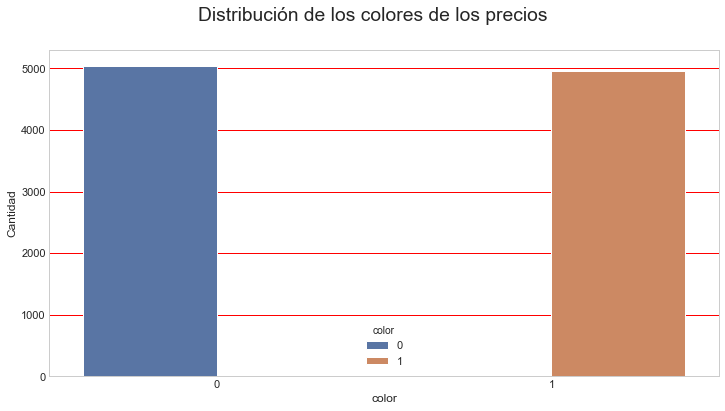

In [462]:
with axes_style({'grid.color': "red"}):
    fig = figure(figsize=(12,6))
    suptitle("Distribución de los colores de los precios")
    ax = countplot(data=features,x="color",hue="color")    
    ax.set_ylabel("Cantidad")
show()

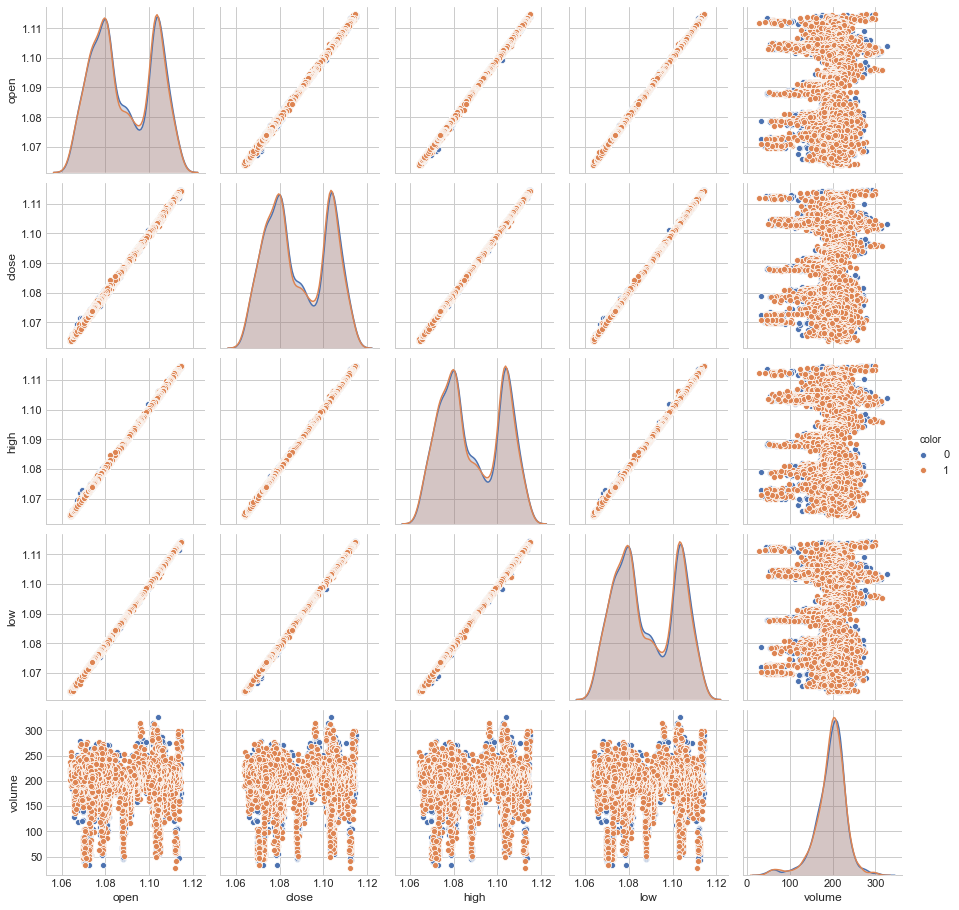

In [463]:
fig = sn.pairplot(data=features[['open','close','high','low','volume','color']], 
                   hue='color')

plt.show()

No handles with labels found to put in legend.


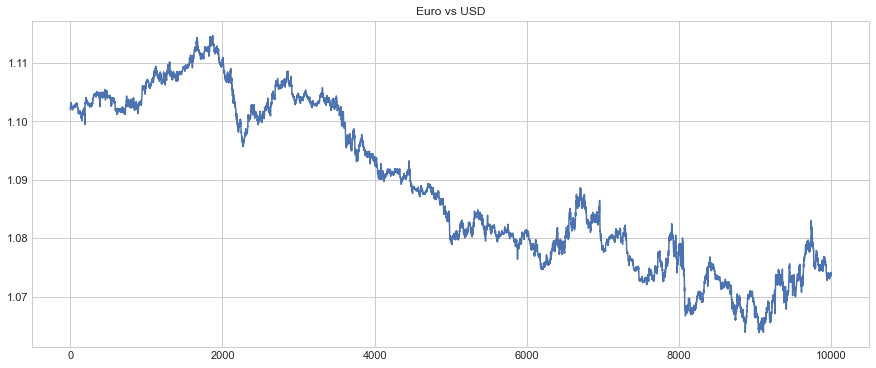

In [464]:
plt.figure(figsize=(15,6))
plt.plot(features.close)
plt.title('Euro vs USD')
plt.legend()
plt.show()

In [465]:
fig = go.Figure(data=[go.Candlestick(x=features['date'],
                open=features['open'],
                high=features['high'],
                low=features['low'],
                close=features['close'])])
fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

#### Bollinger Bands

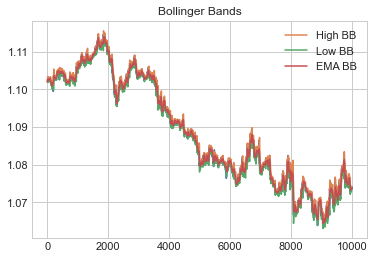

In [466]:
plt.plot(features.close)
plt.plot(features.volatility_bbh, label='High BB')
plt.plot(features.volatility_bbl, label='Low BB')
plt.plot(features.volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

#### Keltner Channel

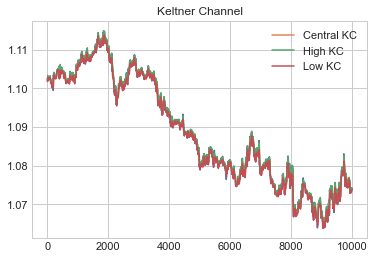

In [467]:
plt.plot(features.close)
plt.plot(features.volatility_kcc, label='Central KC')
plt.plot(features.volatility_kch, label='High KC')
plt.plot(features.volatility_kcl, label='Low KC')
plt.title('Keltner Channel')
plt.legend()
plt.show()

In [468]:
#### Donchian Channel

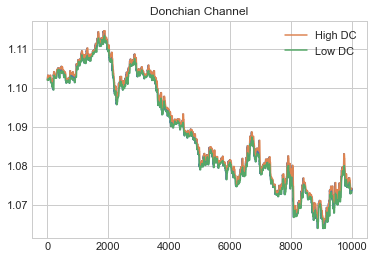

In [469]:
plt.plot(features.close)
plt.plot(features.volatility_dch, label='High DC')
plt.plot(features.volatility_dcl, label='Low DC')
plt.title('Donchian Channel')
plt.legend()
plt.show()

#### MACD

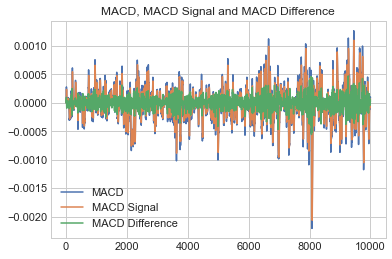

In [470]:
plt.plot(features.trend_macd, label='MACD')
plt.plot(features.trend_macd_signal, label='MACD Signal')
plt.plot(features.trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()

#### Ichimoku Kinkō Hyō

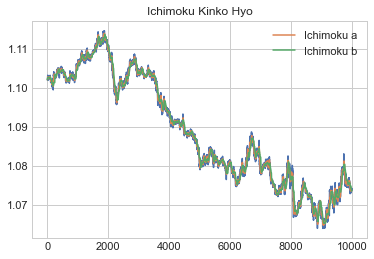

In [472]:
plt.plot(features.close)
plt.plot(features.trend_ichimoku_a, label='Ichimoku a')
plt.plot(features.trend_ichimoku_b, label='Ichimoku b')
plt.title('Ichimoku Kinko Hyo')
plt.legend()
plt.show()

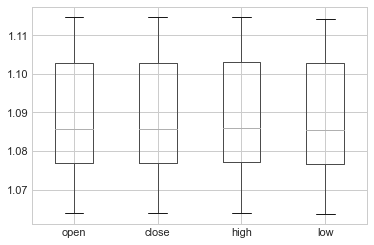

In [473]:
features[["open","close","high","low"]].boxplot()


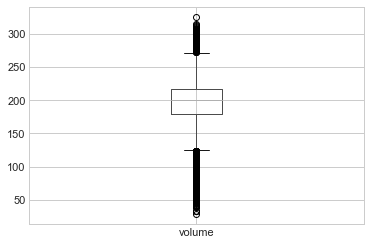

In [474]:
features[["volume"]].boxplot()

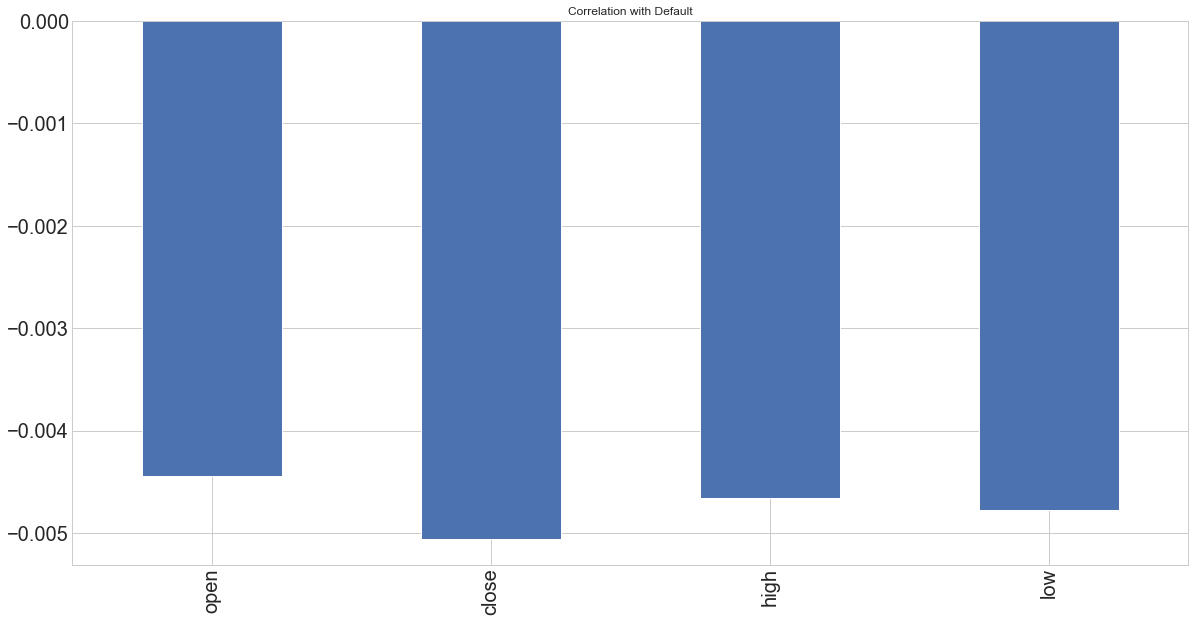

In [475]:
features[["open","close","high","low"]].corrwith(features['color']).plot.bar(
        figsize = (20, 10), title = "Correlation with Default", fontsize = 20,
        rot = 90, grid = True)

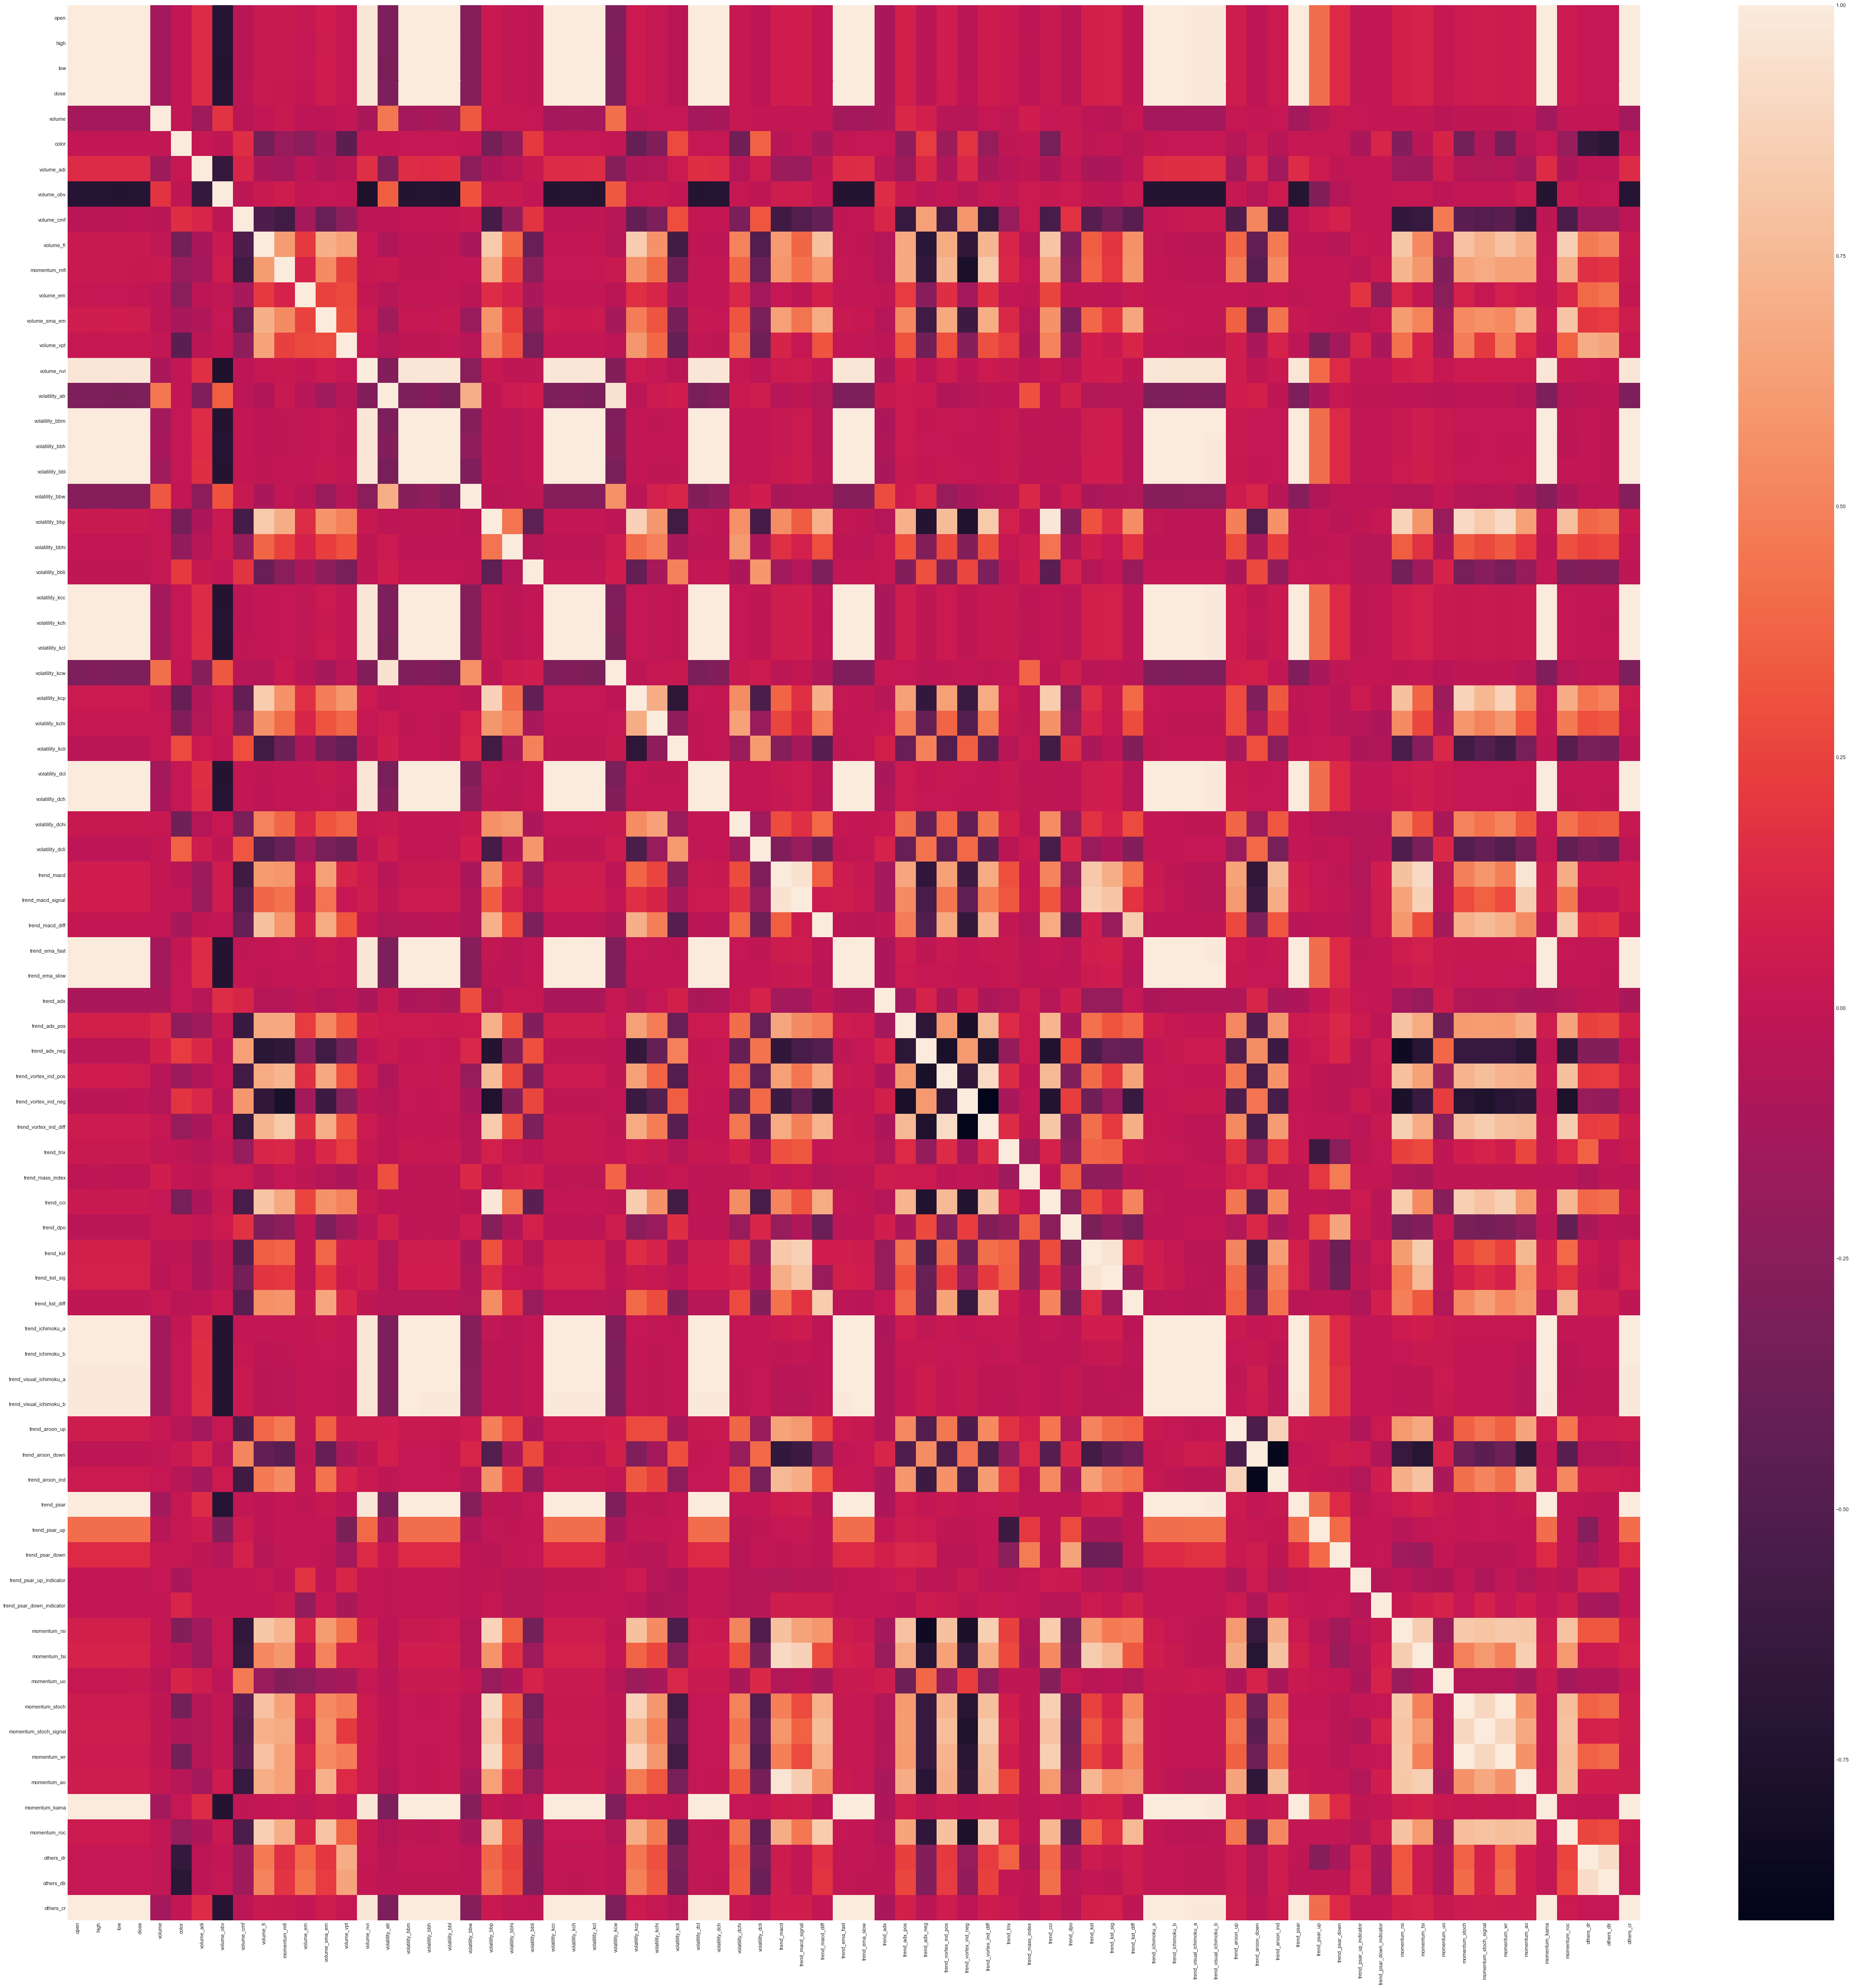

In [476]:
plt.figure(figsize=(75,75))
sn.heatmap(features.corr())

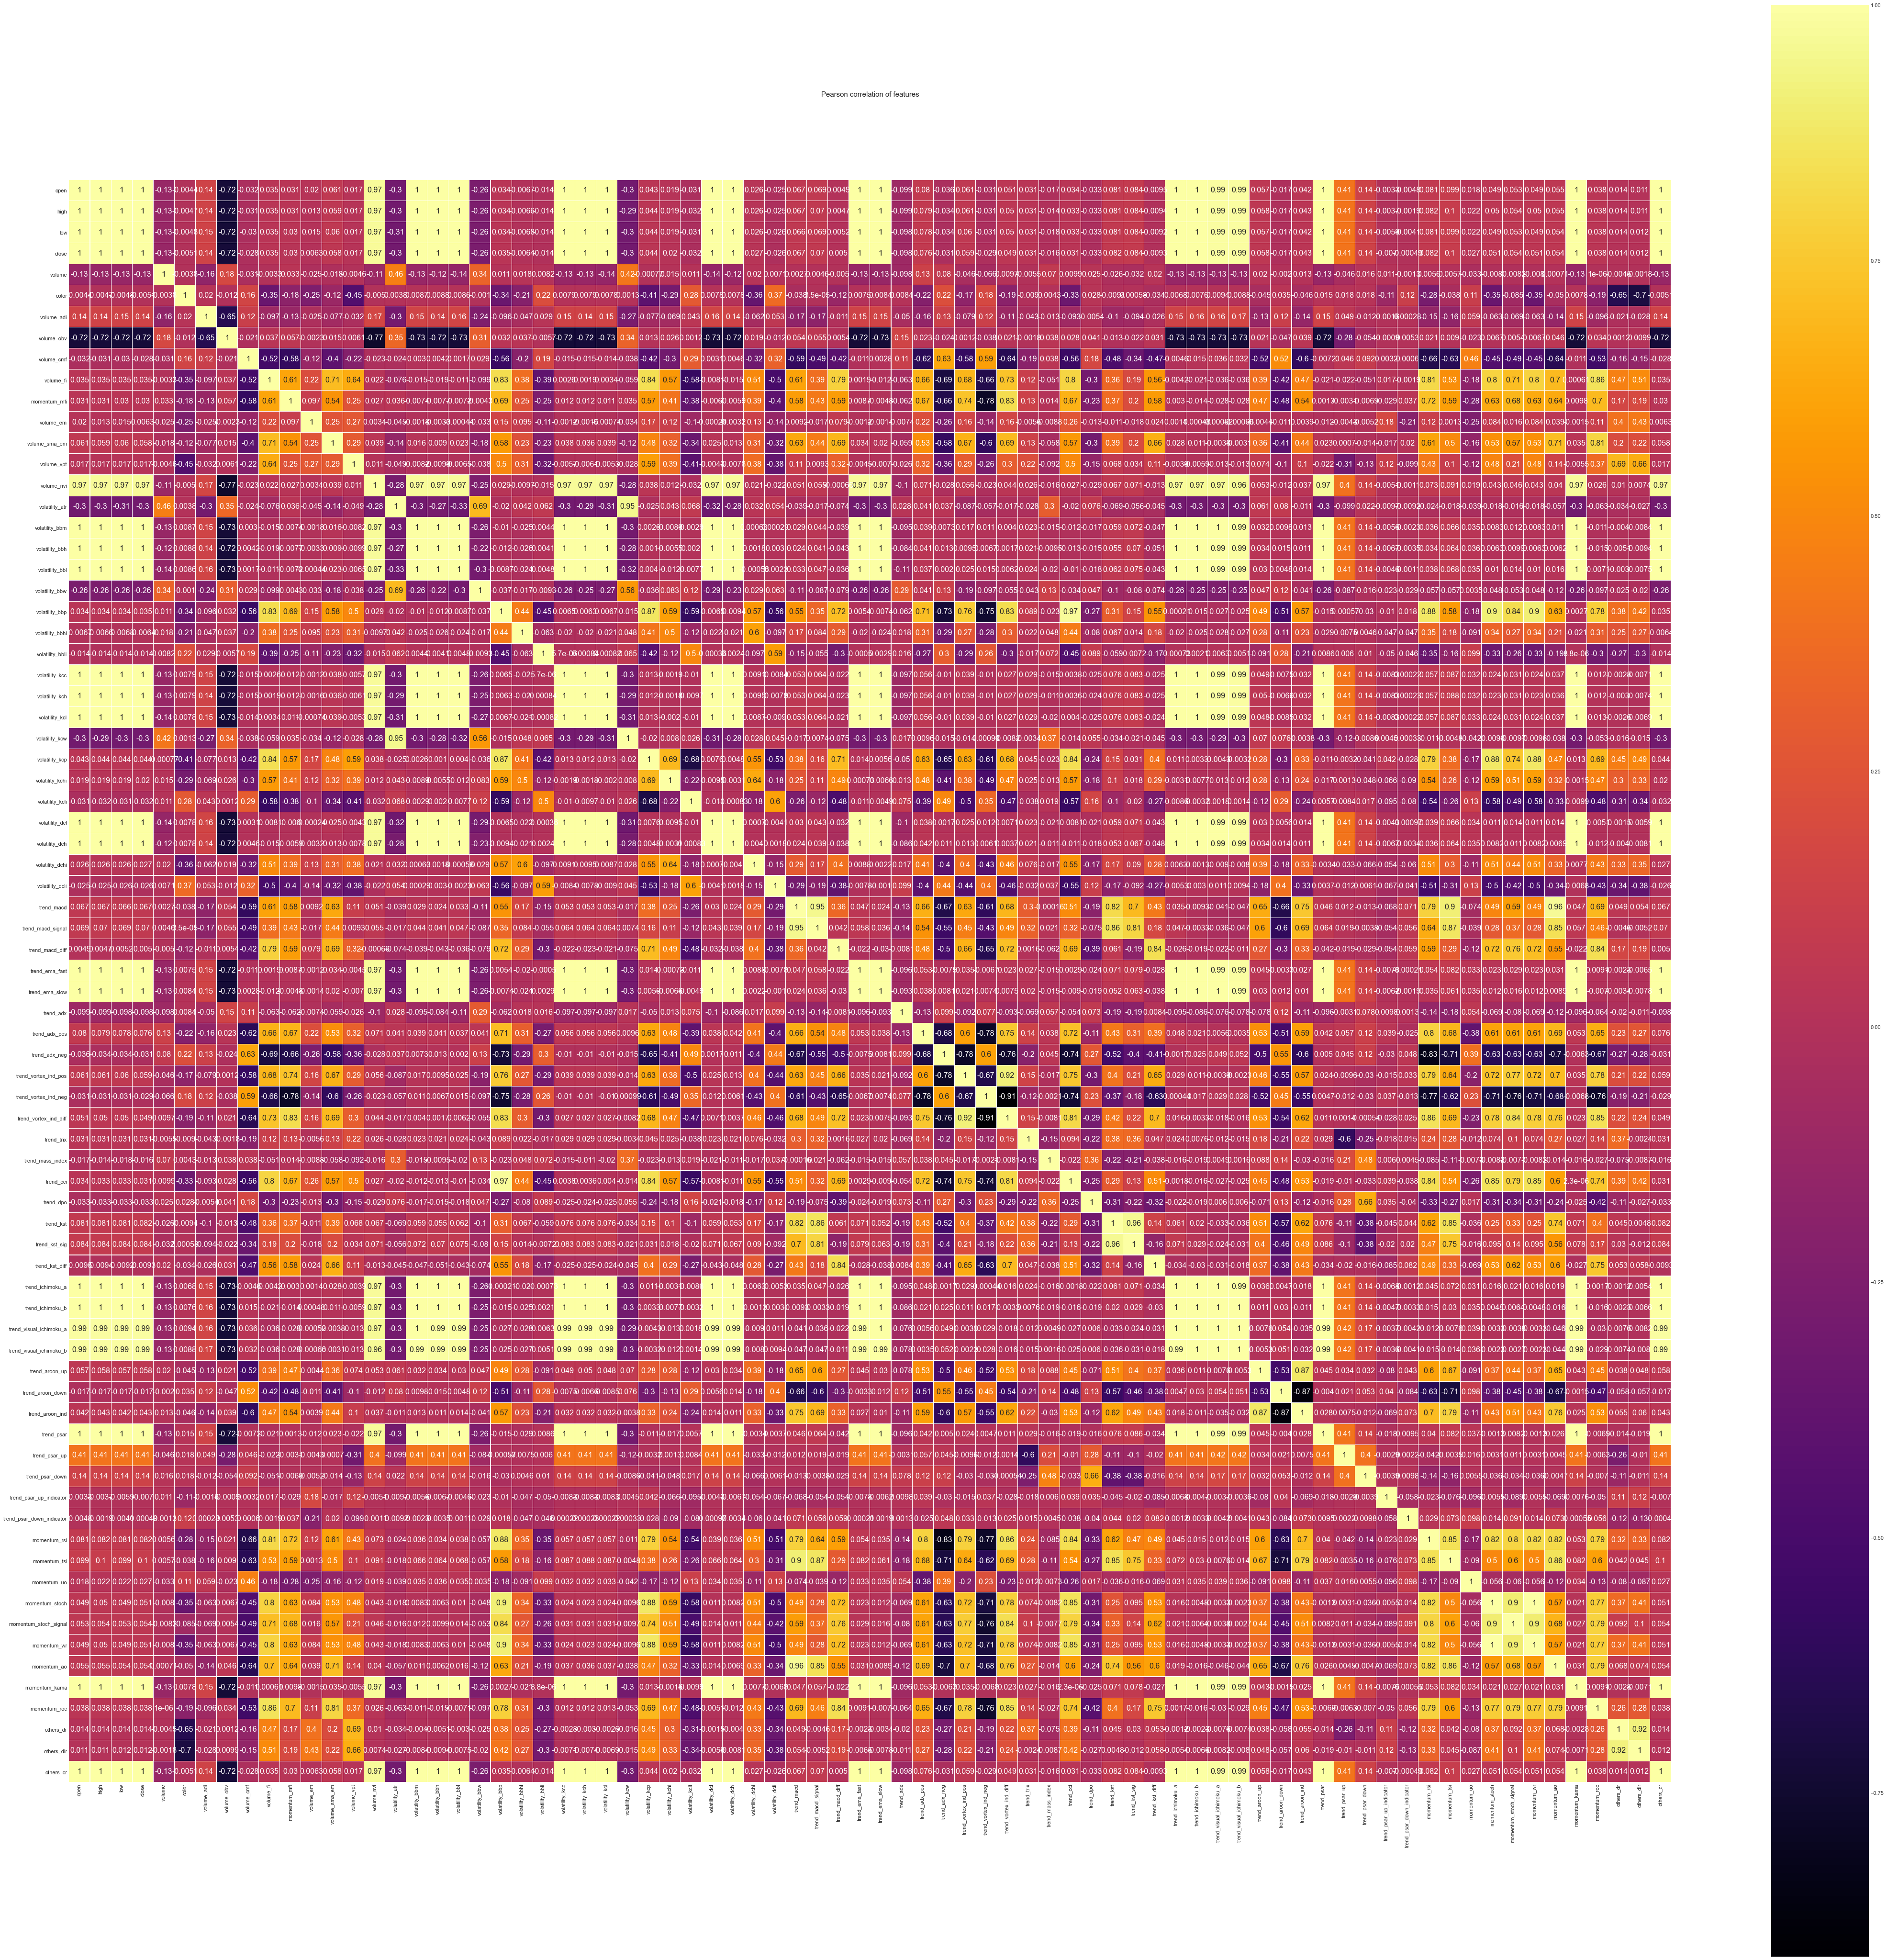

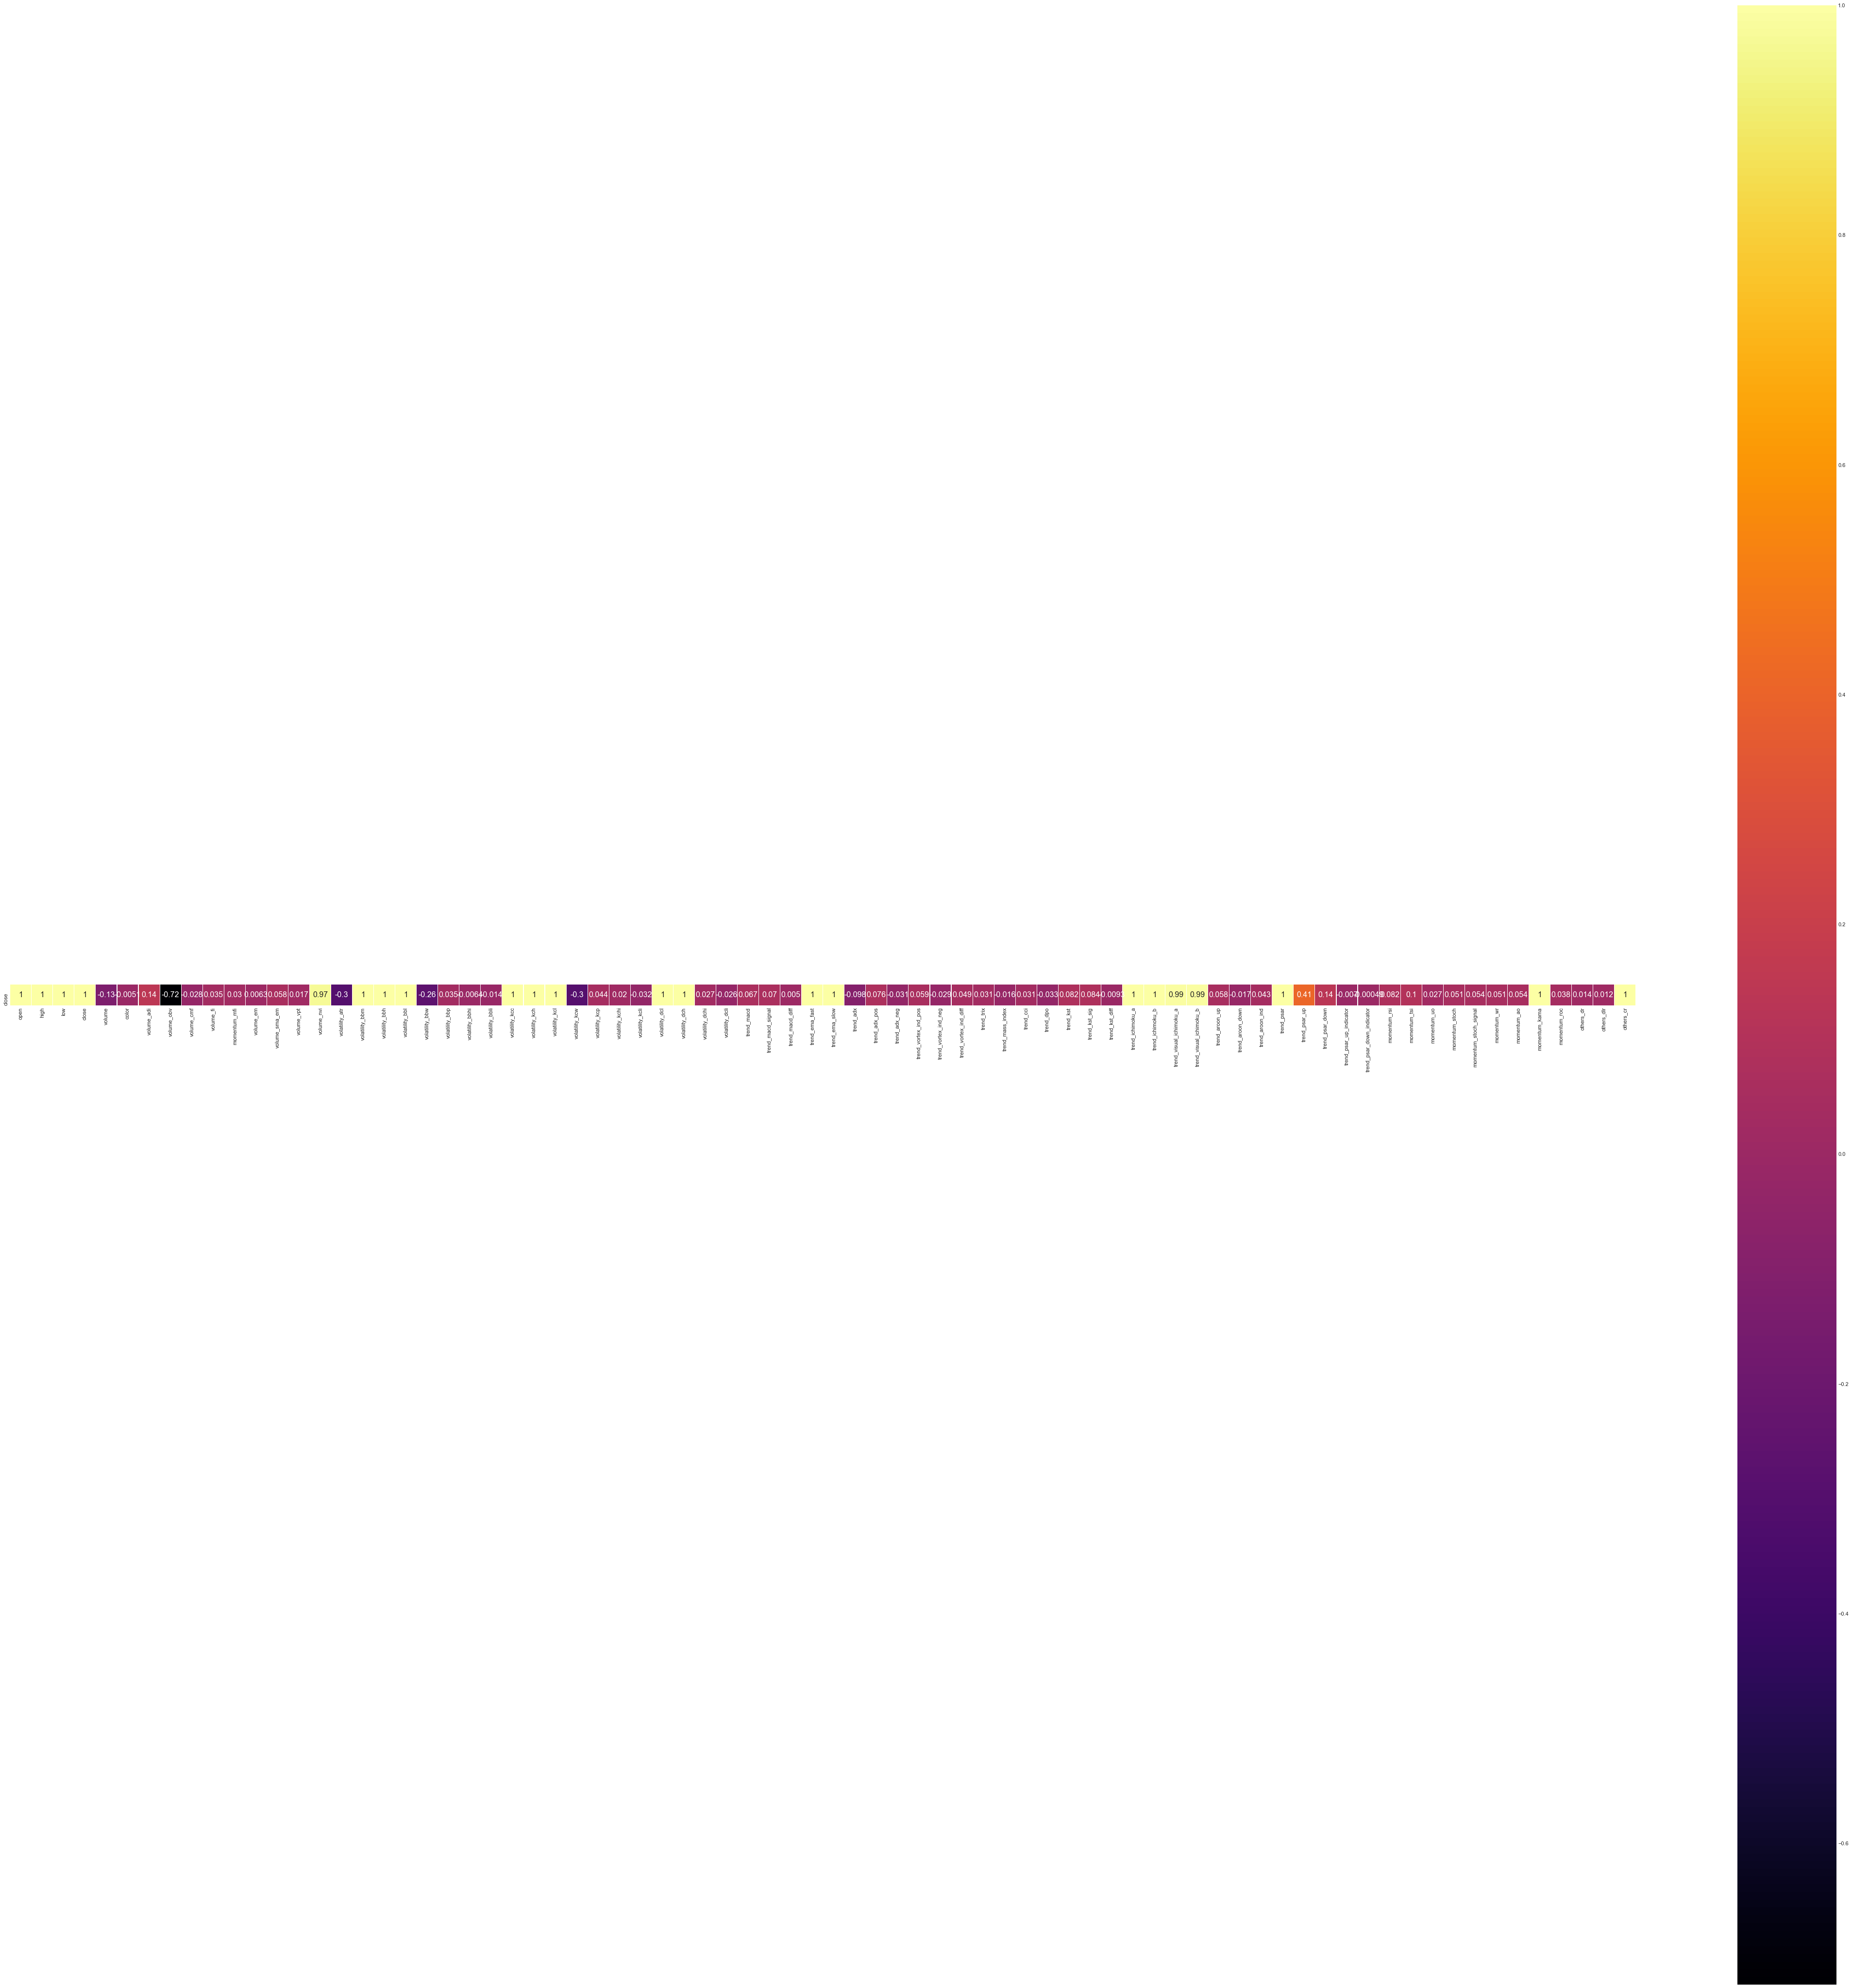

In [477]:
colormap = plt.cm.inferno
plt.figure(figsize=(75,75))
plt.title('Pearson correlation of features', y=1.05, size=15)
sn.heatmap(features.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

plt.figure(figsize=(75,75))
corr = features.corr()
sn.heatmap(corr[corr.index == 'close'], linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

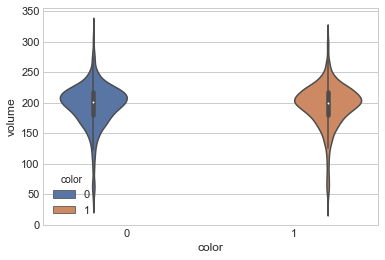

In [478]:
# plotting the violinplot
sn.violinplot(x="color",y="volume", hue="color", data=features);
plt.show()

In [479]:
features.corr()

open      high       low     close    volume  \
open                       1.000000  0.999873  0.999888  0.999760 -0.130503   
high                       0.999873  1.000000  0.999834  0.999896 -0.127468   
low                        0.999888  0.999834  1.000000  0.999884 -0.133775   
close                      0.999760  0.999896  0.999884  1.000000 -0.130708   
volume                    -0.130503 -0.127468 -0.133775 -0.130708  1.000000   
color                     -0.004438 -0.004658 -0.004769 -0.005054 -0.003783   
volume_adi                 0.143846  0.142783  0.145624  0.144477 -0.157016   
volume_obv                -0.723216 -0.722433 -0.723973 -0.723051  0.181097   
volume_cmf                -0.031642 -0.030790 -0.030074 -0.028271 -0.031180   
volume_fi                  0.034967  0.035066  0.035304  0.035411 -0.003280   
momentum_mfi               0.030689  0.030752  0.030033  0.029763  0.032605   
volume_em                  0.019598  0.012919  0.014698  0.006304 -0.025279   
volume_sma_em              0.060911  0.059417  0.060295  0.058261 -0.017675   
volume_vpt                 0.017105  0.017121  0.017493  0.017465 -0.004585   
volume_nvi                 0.972075  0.972259  0.972092  0.972232 -0.105562   
volatility_atr            -0.304460 -0.299141 -0.309416 -0.304120  0.460133   
volatility_bbm             0.998394  0.998521  0.998506  0.998611 -0.130745   
volatility_bbh             0.997313  0.997549  0.997334  0.997548 -0.117924   
volatility_bbl             0.997854  0.997874  0.998056  0.998054 -0.143105   
volatility_bbw            -0.262590 -0.260021 -0.264791 -0.262232  0.335038   
volatility_bbp             0.033887  0.034239  0.034126  0.034505  0.010914   
volatility_bbhi           -0.006739 -0.006583 -0.006826 -0.006403  0.018402   
volatility_bbli           -0.013986 -0.014159 -0.014468 -0.014399  0.008178   
volatility_kcc             0.999187  0.999317  0.999295  0.999400 -0.130455   
volatility_kch             0.999083  0.999287  0.999123  0.999300 -0.125511   
volatility_kcl             0.999140  0.999197  0.999317  0.999349 -0.135346   
volatility_kcw            -0.298703 -0.293052 -0.304073 -0.298496  0.420634   
volatility_kcp             0.043339  0.043826  0.043631  0.044286 -0.000775   
volatility_kchi            0.019057  0.018858  0.019494  0.019568  0.014590   
volatility_kcli           -0.030866 -0.031749 -0.030813 -0.031607  0.011083   
volatility_dcl             0.998107  0.998144  0.998306  0.998319 -0.141369   
volatility_dch             0.997672  0.997903  0.997703  0.997914 -0.119134   
volatility_dchi            0.026223  0.026385  0.026317  0.026572  0.019516   
volatility_dcli           -0.025237 -0.025398 -0.025560 -0.025699  0.007086   
trend_macd                 0.066553  0.067014  0.066463  0.066993  0.002697   
trend_macd_signal          0.069490  0.070035  0.069279  0.069902  0.004578   
trend_macd_diff            0.004868  0.004713  0.005208  0.005041 -0.005026   
trend_ema_fast             0.999200  0.999333  0.999315  0.999426 -0.130616   
trend_ema_slow             0.998481  0.998604  0.998598  0.998697 -0.130787   
trend_adx                 -0.098602 -0.098747 -0.098340 -0.098353 -0.097724   
trend_adx_pos              0.079973  0.079068  0.077745  0.076130  0.131625   
trend_adx_neg             -0.035660 -0.033671 -0.034107 -0.031294  0.080356   
trend_vortex_ind_pos       0.061212  0.060618  0.060189  0.059001 -0.046447   
trend_vortex_ind_neg      -0.031496 -0.030808 -0.030730 -0.029489 -0.065749   
trend_vortex_ind_diff      0.051016  0.050315  0.050035  0.048704  0.009653   
trend_trix                 0.030880  0.030941  0.030748  0.030868 -0.005498   
trend_mass_index          -0.016582 -0.014465 -0.018480 -0.016464  0.070367   
trend_cci                  0.033766  0.032728  0.032755  0.031071  0.009903   
trend_dpo                 -0.033345 -0.033112 -0.033338 -0.033202  0.025036   
trend_kst                  0.081229  0.081445  0.081272  0.081548 -0.026235   
tr

In [480]:
print(features.isnull().sum())

date                         0
open                         0
high                         0
low                          0
close                        0
volume                       0
color                        0
volume_adi                   0
volume_obv                   0
volume_cmf                   0
volume_fi                    0
momentum_mfi                 0
volume_em                    0
volume_sma_em                0
volume_vpt                   0
volume_nvi                   0
volatility_atr               0
volatility_bbm               0
volatility_bbh               0
volatility_bbl               0
volatility_bbw               0
volatility_bbp               0
volatility_bbhi              0
volatility_bbli              0
volatility_kcc               0
volatility_kch               0
volatility_kcl               0
volatility_kcw               0
volatility_kcp               0
volatility_kchi              0
volatility_kcli              0
volatility_dcl               0
volatili

# Preprocesamiento 

In [481]:
# Labels are the values we want to predict
labels = np.array(features['color'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('color', axis = 1)
features= features.drop('date', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
#features = np.array(features)

### Normalización

In [482]:
scaler=StandardScaler()
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [483]:
X_scaled=scaler.transform(features)

In [484]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=.99) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [485]:
pca.n_components_

36

In [486]:
components = pd.DataFrame(pca.components_, columns = features.columns, index=[1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
components

open      high       low     close    volume  volume_adi  volume_obv  \
1  -0.207268 -0.207239 -0.207331 -0.207292  0.031823   -0.035143    0.154514   
2   0.016244  0.016261  0.016324  0.016392 -0.005862    0.036612   -0.029779   
3   0.002335  0.002081  0.002407  0.002113 -0.006390    0.052559   -0.025578   
4  -0.010559 -0.012563 -0.008905 -0.010908 -0.193862    0.136213   -0.083071   
5   0.023789  0.025086  0.021503  0.022618  0.203927   -0.184699    0.084984   
6   0.014707  0.016954  0.014703  0.017538  0.143783   -0.036581    0.008409   
7   0.008934  0.011032  0.007827  0.009835  0.162738   -0.100311    0.046221   
8   0.011257  0.006909  0.007049  0.000891  0.070797   -0.022007   -0.012523   
9   0.010088  0.010933  0.010587  0.011762 -0.019618   -0.119518    0.109751   
10 -0.017387 -0.015726 -0.017953 -0.016368  0.135766    0.586589   -0.390075   
11 -0.000562 -0.000859  0.000745  0.000328 -0.134233   -0.024375    0.016080   
12  0.006798  0.007243  0.007208  0.007970  0.201596   -0.471427    0.275753   
13  0.006244  0.006060  0.005813  0.005533 -0.365580   -0.129233    0.085640   
14 -0.000790 -0.002677  0.001020 -0.000799 -0.052722    0.002136   -0.002105   
15 -0.002107 -0.001927 -0.001705 -0.001422  0.231441   -0.035218    0.025474   
16  0.004490  0.005009  0.003210  0.003526 -0.382598   -0.140256    0.070295   
17 -0.006008 -0.006982 -0.005813 -0.006917 -0.242032   -0.080543    0.024648   
18  0.005916  0.001005  0.002354 -0.003310  0.031378    0.011628   -0.007183   
19 -0.000709 -0.000318  0.001413  0.001905 -0.467302   -0.058904    0.000659   
20  0.010613  0.008325  0.008963  0.006413 -0.149216   -0.002975   -0.046200   
21  0.000224  0.002042 -0.000240  0.001550 -0.323479    0.075086   -0.089588   
22  0.002722  0.002470  0.003373  0.003116 -0.025679   -0.001753   -0.008005   
23 -0.001326 -0.000051 -0.001093 -0.000230  0.102058   -0.007036    0.002652   
24  0.005946  0.005629  0.005634  0.005592  0.020552    0.015504    0.023773   
25 -0.000300 -0.001347 -0.000355 -0.001439  0.038398    0.002070   -0.017456   
26  0.009646  0.008023  0.008639  0.006680  0.048027   -0.029897    0.033257   
27  0.003056  0.002893  0.002795  0.002669 -0.000790    0.018741    0.011736   
28  0.000825  0.000827  0.001056  0.000627 -0.098347   -0.001240   -0.000879   
29  0.003740  0.003413  0.005339  0.004657  0.000855   -0.002665    0.064996   
30  0.003798  0.006733  0.001278  0.004854 -0.086196    0.047011    0.045890   
31 -0.000076  0.002154 -0.001757 -0.000288 -0.062915   -0.035171   -0.025974   
32  0.007861  0.008186  0.009565  0.010469  0.033410    0.042880    0.058471   
33  0.006590  0.006176  0.007503  0.007853  0.006374   -0.035509   -0.032166   
34 -0.004961 -0.002880 -0.003715 -0.001399 -0.025165    0.000415   -0.039498   
35 -0.020847 -0.020943 -0.020688 -0.020449  0.050831   -0.360984   -0.508515   
36  0.023231  0.025419  0.021911  0.024002 -0.037443    0.265871    0.425159   

    volume_cmf  volume_fi  momentum_mfi  volume_em  volume_sma_em  volume_vpt  \
1     0.016401  -0.019562     -0.017949  -0.004003      -0.023497   -0.007855   
2     0.156037  -0.198657     -0.178253  -0.038617      -0.162872   -0.101319   
3     0.088948   0.114027     -0.007700   0.116215      -0.001918    0.212411   
4     0.028266   0.048259     -0.092697   0.101505       0.019107    0.204566   
5    -0.043919   0.009894     -0.041938   0.159595      -0.127328    0.225377   
6     0.053134  -0.015198      0.019066  -0.213069      -0.000528   -0.026445   
7     0.001553  -0.011328      0.022540  -0.073887      -0.019612   -0.008056   
8    -0.249109  -0.035209      0.142730   0.372877       0.176959   -0.057331   
9     0.113605   0.089656     -0.005852   0.068745       0.269158    0.130740   
10   -0.076305  -0.044356      0.020528  -0.106526      -0.084375    0.043689   
11   -0.205091  -0.125172      0.074200  -0.194977      -0.219100    0.029094   
12   -0.033386   0.010621      0.005699  -0.139760      -0.010435    0.0474

In [489]:
def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    for item in important_features:
        print ("Features by importance:\n", item,"\n")



In [490]:
get_important_features(X_pca, pca.components_, features.columns.values)

Features by importance:
 (3.616044865068053, 'momentum_rsi') 

Features by importance:
 (3.4710085700867674, 'trend_vortex_ind_diff') 

Features by importance:
 (3.4487138713386862, 'volatility_bbp') 

Features by importance:
 (3.3461069771794496, 'trend_cci') 

Features by importance:
 (3.3421789459192963, 'momentum_roc') 

Features by importance:
 (3.307562134514346, 'volume_fi') 

Features by importance:
 (3.2050681357657176, 'trend_vortex_ind_pos') 

Features by importance:
 (3.2007696914011916, 'momentum_wr') 

Features by importance:
 (3.2007696914011916, 'momentum_stoch') 

Features by importance:
 (3.188170758663283, 'momentum_ao') 

Features by importance:
 (3.182801037308046, 'momentum_stoch_signal') 

Features by importance:
 (3.1493596685580414, 'trend_adx_neg') 

Features by importance:
 (3.1319830353444362, 'trend_vortex_ind_neg') 

Features by importance:
 (3.017604796479002, 'trend_adx_pos') 

Features by importance:
 (3.005267449290124, 'volatility_kcp') 

Features by 

In [491]:
def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

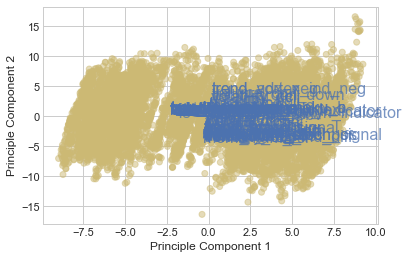

In [492]:
ax = draw_vectors(X_pca, pca.components_, features.columns.values)
T_df = pd.DataFrame(X_pca[:,0:2])
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 125, 'color'] = 'g'
T_df.loc[T_df['component2'] > 125, 'color'] = 'r'

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

In [493]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#5 componentes explican un poco mas del 71% de varianza explicada

shape of X_pca (10000, 36)
[0.30753079 0.25619722 0.0679471  0.04272361 0.0376054  0.02913942
 0.02420587 0.02110828 0.01773256 0.0164942  0.01555396 0.01364303
 0.01342052 0.01212261 0.01166682 0.01091636 0.00980107 0.00842022
 0.00786975 0.00698359 0.00636583 0.00533222 0.0052533  0.00502533
 0.00497049 0.00482415 0.00436673 0.00395181 0.00345862 0.00317984
 0.00289919 0.00268016 0.0024932  0.00206834 0.00187541 0.00175246]
suma: 0.7120041217488979


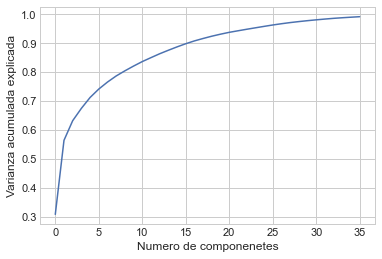

In [494]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componenetes')
plt.ylabel('Varianza acumulada explicada')
plt.show()

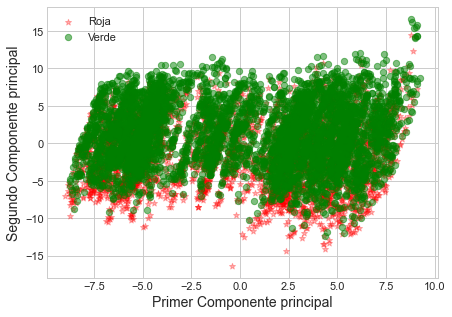

In [495]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels_=pd.DataFrame(labels,columns=['color'])[['color']].values
cdict={0:'red',1:'green'}
labl={0:'Roja',1:'Verde'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels_):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("Primer Componente principal",fontsize=14)
plt.ylabel("Segundo Componente principal",fontsize=14)
plt.legend()
plt.show()

In [496]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, labels,stratify = labels, test_size = 0.25, random_state = RSEED)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7500, 36)
Training Labels Shape: (7500,)
Testing Features Shape: (2500, 36)
Testing Labels Shape: (2500,)


# Modelos Aprendizaje

In [497]:
#-------------- 
# kernel SVM 
#--------------
classifier1 = SVC(kernel="rbf",C=1.0,probability=True)
classifier1.fit( X_train, y_train )

y_pred1 = classifier1.predict( X_test )
probs1 = classifier1.predict_proba( X_test )

train_predictions1 = classifier1.predict(X_train)
train_probs1 = classifier1.predict_proba(X_train)

cm = confusion_matrix( y_test, y_pred1 )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresSVC = cross_val_score( classifier1, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))
classifier1.score(X_train,y_train)

Accuracy on Test Set for kernel-SVM = 0.95
Mean kernel-SVM CrossVal Accuracy on Train Set 0.95, with std=0.01


0.9632

In [498]:
#-------------- 
# Logistic Regression 
classifier2 = LogisticRegression(random_state=0,C=1.0)
classifier2.fit( X_train, y_train )

y_pred2 = classifier2.predict( X_test )
probs2 = classifier2.predict_proba( X_test )

train_predictions2 = classifier2.predict(X_train)
train_probs2 = classifier2.predict_proba(X_train)

cm = confusion_matrix( y_test, y_pred2 )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresLR = cross_val_score( classifier2, X_train, y_train, cv=10)
print("Mean LogReg CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresLR.mean(), scoresLR.std() ))
classifier2.score(X_train,y_train)

Accuracy on Test Set for LogReg = 0.97
Mean LogReg CrossVal Accuracy on Train Set 0.97, with std=0.01


0.9684

In [499]:
#-------------- 
# RandomForestClassifier 
#--------------
classifier3 = RandomForestClassifier(n_estimators=100, criterion='gini')
classifier3.fit( X_train, y_train )

y_pred3 = classifier3.predict( X_test )
probs3 = classifier3.predict_proba( X_test )

train_predictions3 = classifier3.predict(X_train)
train_probs3 = classifier3.predict_proba(X_train)

cm = confusion_matrix( y_test, y_pred3 )
print("Accuracy on Test Set for RandomForestClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresNB = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean RandomForestClassifier CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))
classifier3.score(X_train,y_train)

Accuracy on Test Set for RandomForestClassifier = 0.89
Mean RandomForestClassifier CrossVal Accuracy on Train Set 0.88, with std=0.01


1.0

In [500]:
#-------------- 
# K-NEIGHBOURS 
#--------------
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors=5,weights= 'uniform')
classifier4.fit( X_train, y_train )

y_pred4 = classifier3.predict( X_test )
probs4= classifier3.predict_proba( X_test )

train_predictions4 = classifier3.predict(X_train)
train_probs4 = classifier3.predict_proba(X_train)

cm = confusion_matrix( y_test, y_pred4 )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresKN = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))
classifier4.score(X_train,y_train)

Accuracy on Test Set for KNeighborsClassifier = 0.89
Mean KN CrossVal Accuracy on Train Set Set 0.88, with std=0.01


0.8772

# Evaluación

In [501]:
def evaluate_model(predictions, probs, train_predictions, train_probs, model):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = metrics.roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = metrics.roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title(model+' ROC Curves');

Recall Baseline: 1.0 Test: 0.95 Train: 0.96
Precision Baseline: 0.5 Test: 0.95 Train: 0.96
Roc Baseline: 0.5 Test: 0.99 Train: 0.99


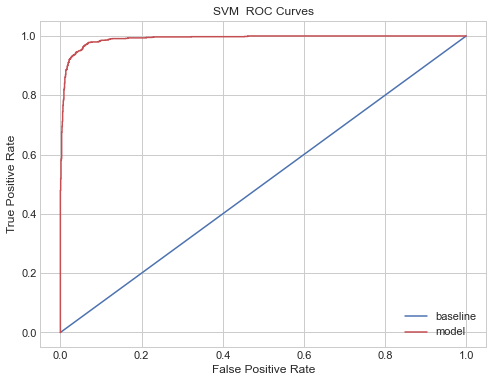

In [502]:
evaluate_model(y_pred1, probs1[:, 1], train_predictions1, train_probs1[:, 1], "SVM ")


Recall Baseline: 1.0 Test: 0.97 Train: 0.97
Precision Baseline: 0.5 Test: 0.97 Train: 0.97
Roc Baseline: 0.5 Test: 0.99 Train: 0.99


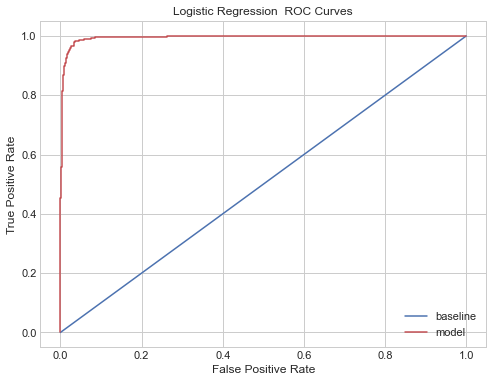

In [503]:
evaluate_model(y_pred2, probs2[:, 1], train_predictions2, train_probs2[:, 1], "Logistic Regression ")

Recall Baseline: 1.0 Test: 0.89 Train: 1.0
Precision Baseline: 0.5 Test: 0.89 Train: 1.0
Roc Baseline: 0.5 Test: 0.96 Train: 1.0


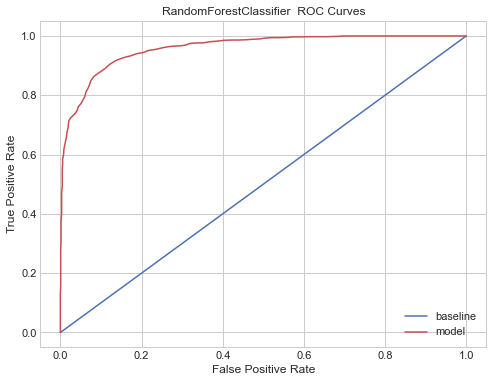

In [504]:
evaluate_model(y_pred3, probs3[:, 1], train_predictions3, train_probs3[:, 1], "RandomForestClassifier ")

Recall Baseline: 1.0 Test: 0.89 Train: 1.0
Precision Baseline: 0.5 Test: 0.89 Train: 1.0
Roc Baseline: 0.5 Test: 0.96 Train: 1.0


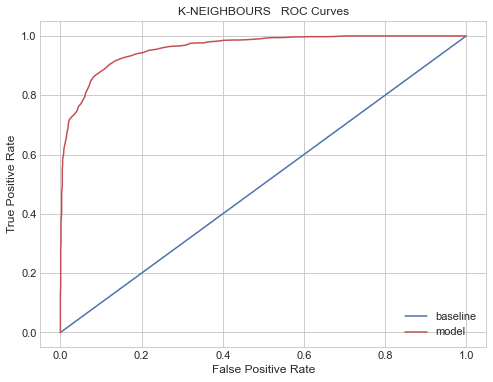

In [505]:
evaluate_model(y_pred4, probs4[:, 1], train_predictions4, train_probs4[:, 1], "K-NEIGHBOURS  ")

# Conclusiones

Los modelos SVM,Logistic Regression brindaron resultados alrededor del 96% de probalidad de clasficar correctamente el set de pruebas, el modelo K-NEIGHBOURS alrededor del 87 de probabilidad de clasificar correctamente. El modelo RandomForestClassifier dio un 100% de probablidad de clasificar correctamente el status del precio, por lo cual no tienen margen de error, por lo cual no se recomienda utilizarlo.

### Recomendación final:
Utilizar el SVM o Logistic Regression para clasificar el estado del precio de las modenas EUR-USD

| Modelo                 | Confusion_matrix | Cross_val_score | Roc  | Score  |
|------------------------|------------------|-----------------|------|--------|
| SVM                    | 0.97             | 0.97            | 0.95 | 0.9684 |
| Logistic Regression    | 0.97             | 0.97            | 0.99 | 0.9684 |
| RandomForestClassifier | 0.88             | 0.89            | 0.96 | 1      |
| K-NEIGHBOURS           | 0.89             | 0.88            | 0.96 | 0.8772 |

In [ ]:
probabilidad 